In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset("Iris")

In [4]:
x = df.drop('species', axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [7]:
x_scaled = sc.fit_transform(x)

In [8]:
import matplotlib.pyplot as plt

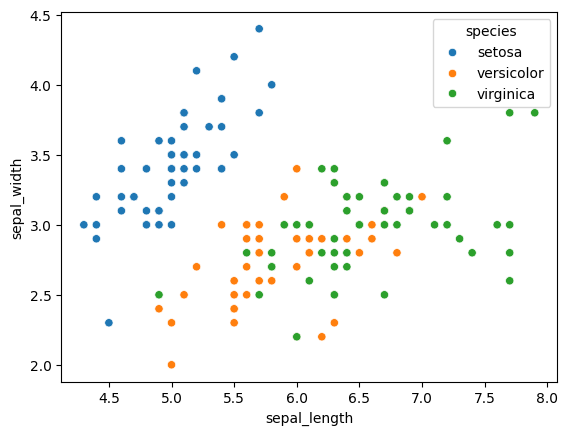

In [9]:
plt.Figure(figsize=(8,6))
sns.scatterplot(x=x['sepal_length'], y=x['sepal_width'], hue=df['species'])
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [12]:
df['cluster'] = kmeans.fit_predict(x_scaled)
centroid = kmeans.cluster_centers_


In [13]:
centroid

array([[ 0.57100359, -0.37176778,  0.69111943,  0.66315198],
       [-0.81623084,  1.31895771, -1.28683379, -1.2197118 ],
       [-1.32765367, -0.373138  , -1.13723572, -1.11486192]])

In [14]:
centroid = sc.inverse_transform(centroid)

In [15]:
centroid

array([[6.31458333, 2.89583333, 4.97395833, 1.703125  ],
       [5.16969697, 3.63030303, 1.49393939, 0.27272727],
       [4.74761905, 2.8952381 , 1.75714286, 0.35238095]])

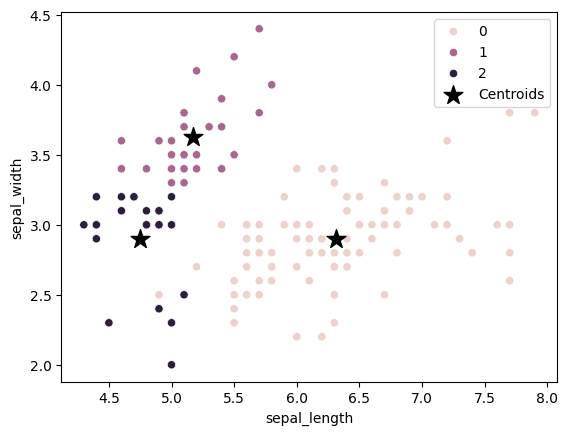

In [16]:
plt.Figure(figsize=(8,6))
sns.scatterplot(x=x['sepal_length'], y=x['sepal_width'], hue=df['cluster'])
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.legend()
plt.show()

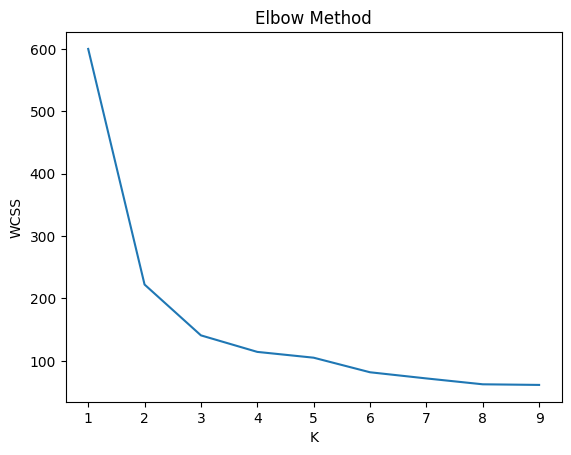

In [18]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()
